## Testing the upper bound for the cost
- As derived theoretically, let's check the lower bound defined for our cost i.e. -
$$ C^{*} \geq P_{0}( \delta^{*}) $$
- where $\delta^{*}$ is the maximum allowable difference in the measured and the actual eigenvalues


### Experiment
- Ask the user for a $\delta^{*}$ value
- Finding the theoretical lower bound i.e. $P_{0}( \delta^{*}) $.
- Letting the algorithm run until we have $ C^{*} \geq P_{0}( \delta^{*}) $.
- Now, let the returned eigenvalue be $\theta_{r}$. 
- Calculate the difference between all the actual eiegenvalues of the unitary and the measured value of the unitary matrix. 
- If the maximum difference between them, $D \leq \delta^{*}$ or it is within $+5\% $ of $\delta^{*}$, our theoretical basis is correct!

- **IMPORTS**

In [7]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
from time import sleep 
import sys 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 
from qiskit import IBMQ 

### Testing is done for 1 qubit matrices

- The values of $\delta^{*}$ range from [0,0.5] and have been defined as - 
      - deltas = [0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01]

In [8]:
# defining the absolute error in the eigenvalue
deltas = [0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01]

In [10]:
# find the target costs for each of the algorithm 
target_costs = []
for i in deltas:
    cost = (np.cos(i))**2 
    target_costs.append(cost)
target_costs

[0.8483533546735827,
 0.9126678074548391,
 0.9605304970014426,
 0.9776682445628029,
 0.9900332889206209,
 0.997502082639013,
 0.9993751301974833,
 0.9999000033332889]

## Single Qubit Unitary
- 2 samples are tested for changing ranges of the **delta** values

In [11]:
u1 = unitary_group.rvs(2)
u1 

array([[0.70054301-0.15999154j, 0.40138414+0.56791986j],
       [0.54174609+0.43606578j, 0.20342627-0.6891847j ]])

In [12]:
eigen_phases1, eigen_vectors1 = np.linalg.eig(u1)
print("Eigen states of Unitary :",eigen_vectors1)
eigen_phases1 = np.angle(eigen_phases1)
ep1 = []
for k in eigen_phases1:
    if k < 0:
        ep1.append((k + 2*np.pi)/(2*np.pi))
    else:
        ep1.append(k/(2*np.pi))
eigen_phases1 = np.array(ep1)
print("Eigen phases of unitary :",eigen_phases1)

Eigen states of Unitary : [[ 0.85520717+0.j         -0.51329432-0.07176098j]
 [ 0.51329432-0.07176098j  0.85520717+0.j        ]]
Eigen phases of unitary : [0.0235119  0.73643336]


- Note that the eigenphases have been scaled down to lie in the range $[0,1]$

In [13]:
from normal_SPEA import SPEA 
backend = Aer.get_backend('qasm_simulator')

In [14]:
# looping and storing the results we get 
generated_deltas, errors = [],[]
for delta,cost in zip(deltas,target_costs):
    spea = SPEA(u1,resolution=35,max_iters=15)
    max_differences = []
    delta_error = []
    print("TARGET COST :",cost)
    print("GIVEN DELTA :",delta)
    # doing numerous experiments to converge 
    for exp in range(10):
        result = spea.get_eigen_pair(backend = backend,progress = False, randomize = True, target_cost = cost)
        print("Result with target cost as",cost,"was returned\n",result)
        # find the final cost 
        theta = result['theta']
        stop_cost = result['cost']

        # find the maximum difference between the eigenphases and this returned phase 
        max_diff = max(abs(eigen_phases1 - theta)) 
        max_differences.append(max_diff)

        # now append this and the error from how it actually should have been 
        # NOTE - there is no error if the max difference is actually less than 
        # the delta desired .
        if delta - max_diff >= 0:
            error = 0 
        else:
            # this error should not be more than 5-6 % or 0.05 - 0.06 
            error = abs((delta - max_diff))/delta
        delta_error.append(error)
    # the maximum would be a better metric 
    generated_deltas.append(np.average(max_differences))
    errors.append(np.average(delta_error))


TARGET COST : 0.8483533546735827
GIVEN DELTA : 0.4


E:\ANACONDA\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.853515625, 'theta': 0.08823529411764705, 'state': array([-0.43593844+0.45776765j, -0.4851735 +0.60416317j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.9453125, 'theta': 0.7647058823529411, 'state': array([-0.56813966+0.49070119j,  0.46582665-0.4684391j ])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.912109375, 'theta': 0.058823529411764705, 'state': array([0.8927806 +0.0082592j , 0.28293508-0.35046017j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.861328125, 'theta': 0.9134948096885813, 'state': array([0.68723511-0.71187698j, 0.08047369-0.12026246j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.796875, 'theta': 0.11348399653979241, 'state': array([-0.24581451+0.6055219j ,  0.40601323+0.63880491j])}
Result with target cost as 0.848353354

Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.91796875, 'theta': 0.9413141605105303, 'state': array([ 0.14801504-0.68485272j, -0.24436377-0.67033921j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.982421875, 'theta': 0.7467560553633219, 'state': array([-0.30065388+0.25211261j,  0.85080373-0.34954183j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.978515625, 'theta': 0.04223488703439854, 'state': array([-0.69684244+0.30585277j, -0.63119626+0.14985317j])}
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.990234375, 'theta': 0.032320183696315896, 'state': array([-0.23740851+0.89132892j, -0.055778  +0.38217637j])}
Maximum iterations reached for the estimation.
Terminating algorit

Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.826171875, 'theta': 0.8371539792387543, 'state': array([0.62220983-0.7162504j, 0.13901819+0.2837503j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.59375, 'theta': 0.15313446150519028, 'state': array([-0.55543298-0.65665425j,  0.34095106-0.37954155j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.96875, 'theta': 0.05793939548137594, 'state': array([0.22485542+0.91780895j, 0.22312688+0.23933485j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.990234375, 'theta': 0.04464249634822381, 'state': array([-0.4262277 +0.7400227j ,  0.01249823+0.52013473j])}
Maximum

### Plot 1
- Plotting the Generated Maximum difference in eigenvalues and the Given **delta** values

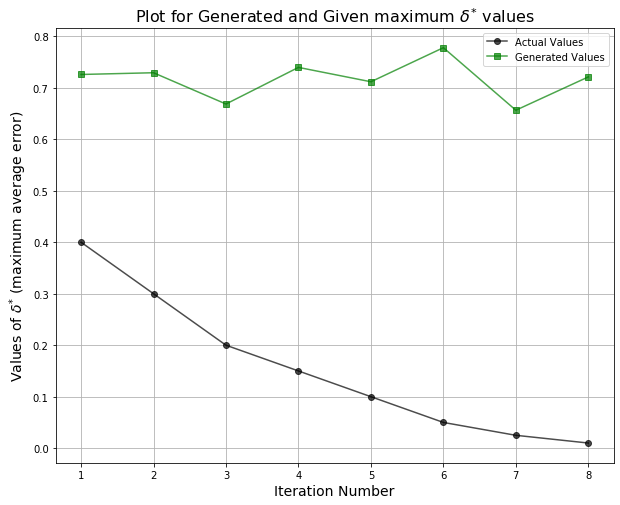

In [15]:
iters = [i for i in range(1,9)]
plt.figure(figsize=(10,8))
plt.title("Plot for Generated and Given maximum $ \delta^{*}$ values",fontsize=16)
plt.xlabel("Iteration Number", fontsize = 14)
plt.ylabel("Values of $ \delta^{*}$ (maximum average error)",fontsize = 14)
plt.grid()
plt.plot(iters, deltas, label = 'Actual Values', color = 'black', alpha = 0.7, marker = 'o')
plt.plot(iters, generated_deltas, label = 'Generated Values', color = 'green', alpha = 0.7, marker = 's')
plt.legend()
plt.savefig("Plot for verifying Cost Lower Bound.JPG",dpi = 200)

## Plot 2
- Plotting the error in the Generated and the Given delta values

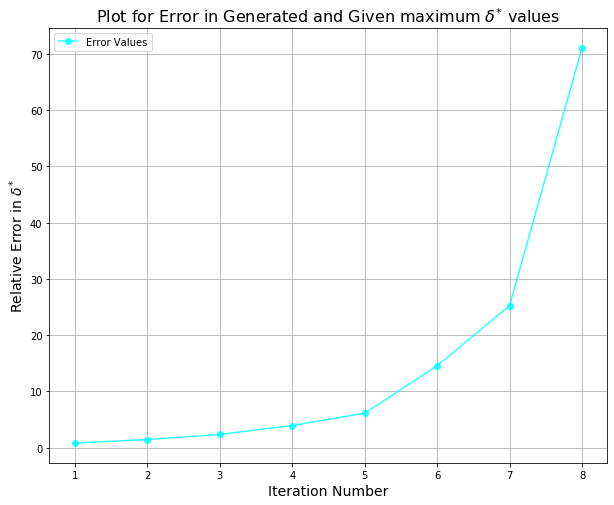

In [17]:
plt.figure(figsize=(10,8))
plt.title("Plot for Error in Generated and Given maximum $ \delta^{*}$ values",fontsize=16)
plt.xlabel("Iteration Number", fontsize = 14)
plt.ylabel("Relative Error in $ \delta^{*}$",fontsize = 14)
plt.grid()
plt.plot(iters, errors, label = 'Error Values', color = 'cyan', alpha = 0.8, marker = 'o')
plt.legend()
plt.savefig("Plot for Error in Cost Lower Bound.JPG",dpi = 200)

## Inference
- <font color = 'brown'> This hypothesis **failed** to work and we could not establish a lower bound to the cost of required in the algorithm </font> 